#### What is Machine Learning?
>Field of study that gives computers the ability to learn without being explicitly programmed (Arthur Samuel)

#### Fire up Python Data Science tools

In [1]:
import numpy as np

import pandas as pd

import sklearn

import matplotlib.pyplot as plt

%matplotlib inline

#### Load some house sales data

Dataset is from the house sales in King Couty, WA

In [2]:
sales = pd.read_csv('home_data.csv')

In [3]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Simple Linear Regression

#### Simplification One
We'll care, for now, only about one feature, 'sqft_living'

In [4]:
simple_features=['sqft_living']

In [5]:
sales[simple_features+['price']].head()

,sqft_living,price
0,1180,221900
1,2570,538000
2,770,180000
3,1960,604000
4,1680,510000


#### Visualize the sqft_living -> price relationship

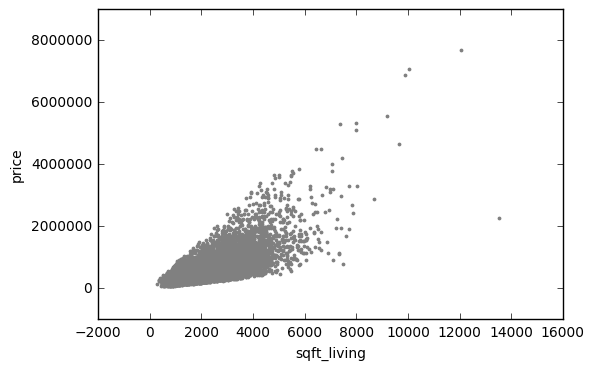

In [6]:

plt.scatter(x= sales.sqft_living, y = sales.price, color='gray', s = 3)
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.ticklabel_format(style = 'plain')


#### Simplification Two
We'll pretend, for now, that the relationship between 'sqft_living' and the 'price'' is linear

$$price=w_0+w_1*sqft\_living$$

<img src= "rss.png" >

##### OK, we'll try to fit the line, but which one?'
>Machine Learning algorithms solve the optimiztion problem

$$\sum_{i=1}^{N}(y_i-(w_0+w_1\times x_i)^{2}$$

#### Digresion: train vs test data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_data, test_data = train_test_split(sales, test_size=0.2, random_state=42)

In [ ]:
print ('train data fraction: ', len(train_data)/len(sales))
print ('test data fraction: ', len(test_data)/len(sales))

#### Train the simple model

In [ ]:
from sklearn import linear_model

In [ ]:
simple_model = linear_model.LinearRegression()
X = train_data[simple_features]
y = train_data.price.to_frame()

In [ ]:
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [ ]:
_ = simple_model.fit(X=X, y = y)

#### Make predictions with the simple model

In [ ]:
simple_model_predictions = simple_model.predict(sales[simple_features])

#### Visualize simple model predictions

In [ ]:

plt.scatter(sales.sqft_living, sales.price, color='gray', s = 2)
plt.plot(sales.sqft_living, simple_model_predictions, color='red')




plt.xlabel('sqft_living')
plt.ylabel('price')
plt.ticklabel_format(style = 'plain')

In [ ]:
print('simple model intercept:', simple_model.intercept_)
print('simple model slope:', simple_model.coef_[0])

#### Let's train  other, more complicated model

In [ ]:
other_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [ ]:
other_model = linear_model.LinearRegression()
X= train_data[other_features]
y = train_data.price

In [ ]:
_ = other_model.fit(X = X, y = y)


#### Evaluate the models

In [ ]:
def rss(model, data, features, target):
    predictions = model.predict(data[features])
    return np.sum((predictions-target)**2)

In [ ]:
simple_rss = rss(simple_model, test_data, simple_features, test_data.price.values)
other_rss = rss(other_model, test_data, other_features, test_data.price.values)


In [ ]:
print(' Simple model RSS on test data:', simple_rss)
print('Other model RSS on test data:', other_rss)

##### make predictions for the real houses

In [ ]:
house1 = sales[sales.id== 5309101200]
house2 = sales[sales.id == 1925069082]

In [ ]:
simple_model_house1_prediction = simple_model.predict(house1[simple_features])[0][0]
other_model_house1_prediction = other_model.predict(house1[other_features])[0]
simple_model_house2_prediction = simple_model.predict(house2[simple_features])[0][0]
other_model_house2_prediction = other_model.predict(house2[other_features])[0]


In [ ]:
print('house1, simple model:', simple_model_house1_prediction)
print('house1, other model:', other_model_house1_prediction)
print('house1, actual price:', house1.price.values[0])

In [ ]:
print('house2, simple model:', simple_model_house2_prediction)
print('house2, other model:', other_model_house2_prediction)

print('house2, actual price:', house2.price.values[0])

#### All models are wrong; some models are useful (George Box)

<img src='book.jpg'>